# Problem Statement 

In order to forecast the sales of each product at a specific store, BigMart Sales Prediction aims to comprehend the characteristics of products and how they interact with factors unique to each store.

### Goal : 

Predict the sales of a product at a particular store so it would help :

- enhance inventory management
- increase sales 
- marketing decision

# Hypothesis Generation 

> Brainstorming the factors that affect the outcome.    

- consumer behaviour : 
    - age , income and family size
    - loyalty programs
    - maketing campaigns
    - online reviews

- product :
    - higher brand recognition ( higher sales )
    - near expiration date ( lower sales )
    - new product launches ( lowers sales compared to old known products )

- market (store) conditions : 
    - location ( traffic , income levels )
    - better placement , displays
    - shorter wait times 

- macro :
    - competitors prices 
    - inflation

### Loading packages

loading the essential packages to analyze , transform , visualize the data

In [11]:
import pandas as pd # data manipulation library
import numpy as np # scientific computing library
import matplotlib.pyplot as plt # basic visualization library
import seaborn as sns # advanced visualization library

### Data 

- Train.csv: this file includes "Outcome_Sales" as the target variable, along with features pertaining to the product, store, and data used to train the model. 

- Test.csv: the only difference is that the target variable isn't there because we need this data to see if the model can generalize its prediction and, more broadly, to identify issues during the model's evaluation phase.


### Data Structure and Content

I'll be primarly using pandas to manipulate data next to numpy

In [3]:
train_data = pd.read_csv('data/Train.csv')
test_data = pd.read_csv('data/Test.csv')

#### EDA - Exploratory Data Analysis

- I will be trying to discover data dimension , features and the target variables (columns)

In [10]:
train_data.shape

# 12 columns in the dataset
# 8523 rows in the dataset

test_data.shape

# 11 columns in the dataset ( Item_Outlet_Sales is the target variable )
# 5681 rows in the dataset ( about 1/3 of the train data )

(5681, 11)

In [13]:
# Making a copy of the train and test data to avoid modifying the original data
train_copy = train_data.copy()
test_copy = test_data.copy()

#### Features

12 features , I need to discover their type , content ...

In [41]:
# train_copy.info()

train_copy.columns
# first 5 rows of Item_visibility


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Item_Weight and Outlet_Size have missing values cause they lack values in the non-null count

- categorical features : 
  - Item_Fat_Content
  - Item_Type
  - Outlet Type
  - Outlet Size 
  - Outlet_Location_Type

- numerical features : 
  - Item_Visibility
  - Item_Weight
  - Item_MRP
  - Item_Identifier
  - Outlet_Identifier
  - Outlet_Establishment_Year


In [48]:
# Merging the Train and Test data to perform data Exploration
train_copy['source'] = 'train' # creating a new column in the train data and setting it to 'train'
# the reason for this is to be able to separate the train and test data after merging

# adding a column 'Item_Outlet_Sales' to the test data and setting it to 0
test_copy['Item_Outlet_Sales'] = 0
test_copy['source'] = 'test'

# merging the train and test data
data = pd.concat([train_copy, test_copy], sort = False) # preserve the order of the train and test data


print(train_copy.shape)
print(train_copy.columns) # 13 columns because source was added
print(test_copy.shape)
print(test_copy.columns) # 13 columns because source and Item_Outlet_Sales were added
print(data.shape) # (14204, 13)

(8523, 13)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')
(5681, 13)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')
(14204, 13)


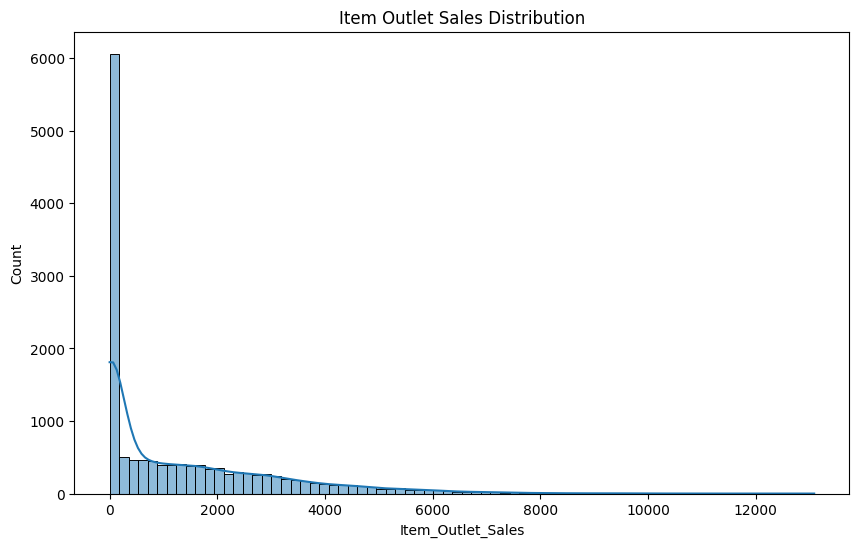

In [51]:
# describing the data and plotting the distribution of the target variable

data.describe()
plt.figure(figsize = (10, 6)) # 10 for width and 6 for height
sns.histplot(data['Item_Outlet_Sales'],kde=True) # kde is the kernel density estimation which is used to plot the probability density of a continuous variable
plt.title('Item Outlet Sales Distribution')
plt.show()


#### measuring the skewness and Kurtosis 

- Skewness : asymmetry of the probability distribution of the Outlet Sales around its mean 
either pos or neg , undef 

- -1 > skewness or skewness > 1 : highly skewed

- between -0.5 and -1 or between 0.5 and 1 : moderately skewed 

- between -0.5 and 0.5 symetric 

- Kurtosis : helps us identifying the existence of extreme values 


In [52]:
# skewness 

print(f'Skewness: {data["Item_Outlet_Sales"].skew()}') # highly skewed to the right (positive skewness)

# kurtosis 

print(f'Kurtosis: {data["Item_Outlet_Sales"].kurt()}')

Skewness: 1.5446838706795227
Kurtosis: 2.4194394261737586


### EDA - Univariate Analysis 

- exploring features individually 
for continuous variables ( histograms ) and for categorical variables ( bar plots )

In [ ]:
# target variable 
plt.hist(data['Item_Outlet_Sales'],bins=100)
plt.show()

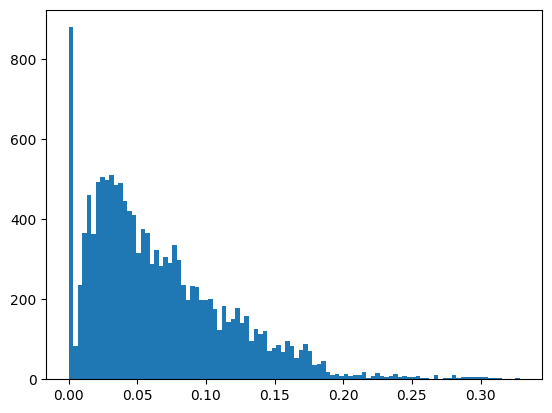

In [58]:
# Item visibility 
plt.hist(data['Item_Visibility'],bins=100) # used hist again to plot the distribution of the item visibility because it is a continuous variable    
plt.show()
# Item visibility is highly skewed to the right
# it must be transformed to a normal distribution

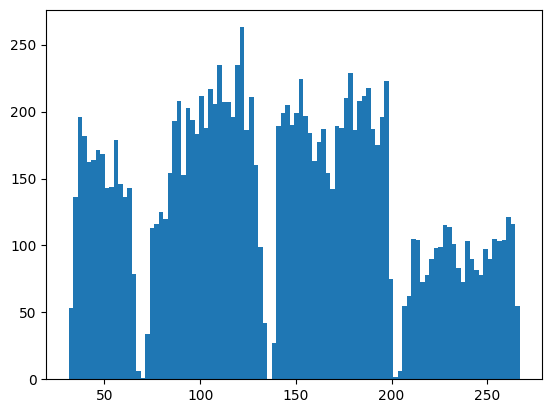

In [59]:
# Item_MRP 
plt.hist(data['Item_MRP'],bins=100) 
plt.show()
# it is normally distributed

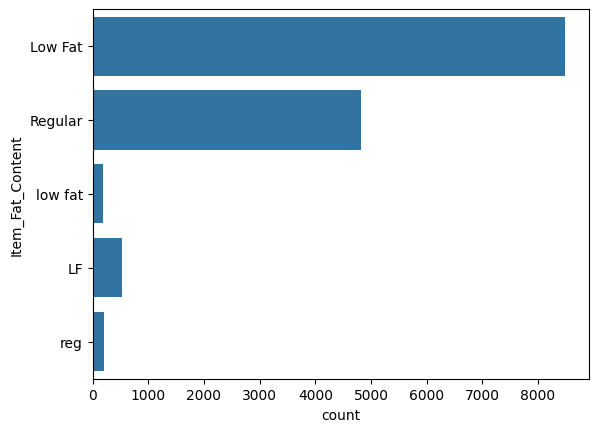

In [60]:
# Visualizing categorical variables
# Item_Fat_Content
sns.countplot(data['Item_Fat_Content']) # countplot is used to show the counts of observations in each categorical bin using bars
plt.show()

In [ ]:
# LF is the same as Low Fat , reg is the same as Regular 
# low fat is the same as Low Fat

# replacing LF with Low Fat and reg with Regular , low fat with Low Fat
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

# plotting again 
sns.countplot(data['Item_Fat_Content'])
plt.show()

In [ ]:
# Item_Type

sns.countplot(data['Item_Type'])
plt.show()